## Customer Satisfaction Prediction - ML Case Study

---

**Problem Overview:**

The goal of this project is to predict customer satisfaction based on their responses to a short survey. Each respondent answered six questions related to their order and app experience, with responses rated from 1 (strongly disagree) to 5 (strongly agree). The target variable indicates whether the customer is happy (1) or unhappy (0).

**Data Description:**

    Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
    X1 = my order was delivered on time
    X2 = contents of my order was as I expected
    X3 = I ordered everything I wanted to order
    X4 = I paid a good price for my order
    X5 = I am satisfied with my courier
    X6 = the app makes ordering easy for me

All features are on a 1–5 Likert scale.

**Objective:**

Build a predictive model that classifies customer satisfaction with at least 73% accuracy. Additionally, identify which survey questions are most relevant, with the aim of simplifying future surveys without compromising predictive performance.


----

### Let's begin with Exploratory Data Analysis

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [13]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
print(df.duplicated().sum())

16


In [17]:
duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())
duplicates.shape

(31, 7)

#### The number of duplicates is significant: 31 rows in the dataset are repeated instances, corresponding to 15 unique duplicated rows (=31-16).

In [20]:
df.value_counts().loc[lambda x: x > 1].reset_index()

,Y,X1,X2,X3,X4,X5,X6,count
0,1,5,1,3,3,4,4,3
1,0,4,3,5,5,5,4,2
2,1,5,4,4,4,4,5,2
3,1,5,5,5,5,5,5,2
4,1,5,3,4,3,4,5,2
5,0,4,2,4,4,4,4,2
6,1,5,1,5,5,5,5,2
7,1,5,2,4,4,5,5,2
8,1,3,3,1,3,3,4,2
9,1,4,3,2,4,3,4,2


The number of duplicates is significant, I chose to keep them, as the problem statement makes no mention of handling duplicates. Therefore, I consider them representative of the dataset and reflective of the original data distribution.

In [23]:
print(df.isnull().sum())

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


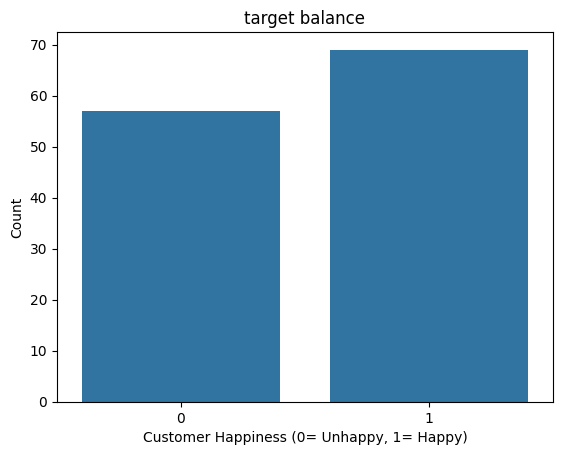

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Y', data=df)
plt.title("target balance")
plt.xlabel("Customer Happiness (0= Unhappy, 1= Happy)")
plt.ylabel("Count")
plt.show()

In [26]:
rows = df.shape[0]
print(f'Class\t\t\trows\t%\nPossitive(1 = Happy)  \t{df[df['Y']==1].shape[0]} \t{(100*df[df['Y']==1].shape[0]/rows):.1f}')
print(f'Negative(0 = Unhappy)\t{df[df['Y']==0].shape[0]} \t{(100*df[df['Y']==0].shape[0]/rows):.1f}')

Class			rows	%
Possitive(1 = Happy)  	69 	54.8
Negative(0 = Unhappy)	57 	45.2


#### Although the dataset is fairly balanced (54.8% happy vs. 45.2% unhappy), the proportion of unhappy customers is surprisingly high for a satisfaction survey. For a promising service, we would typically expect a significantly lower rate of dissatisfaction.


In [30]:
features = [ 'X' + str(i) for i in range(1,7,1)]


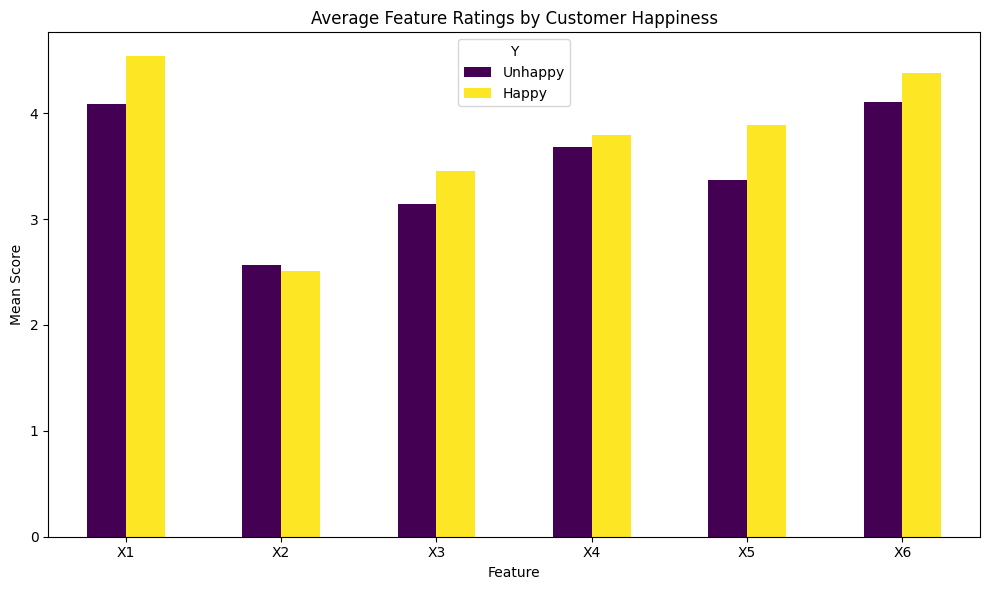

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

means = df.groupby('Y')[features].mean().T
means.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Feature Ratings by Customer Happiness')
plt.ylabel('Mean Score')
plt.xlabel('Feature')
plt.xticks(rotation=0)
plt.legend(title='Y', labels=['Unhappy', 'Happy'])
plt.tight_layout()
plt.show()

##### X1 = my order was delivered on time
##### X2 = contents of my order was as I expected
##### X3 = I ordered everything I wanted to order
##### X4 = I paid a good price for my order
##### X5 = I am satisfied with my courier
##### X6 = the app makes ordering easy for me

#### **Descriptive Statistics**

In [36]:
df.groupby('Y').mean()

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


In [38]:
df.groupby('Y').std()

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
1,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908


#### **Boxplot and stripplot for each feature**

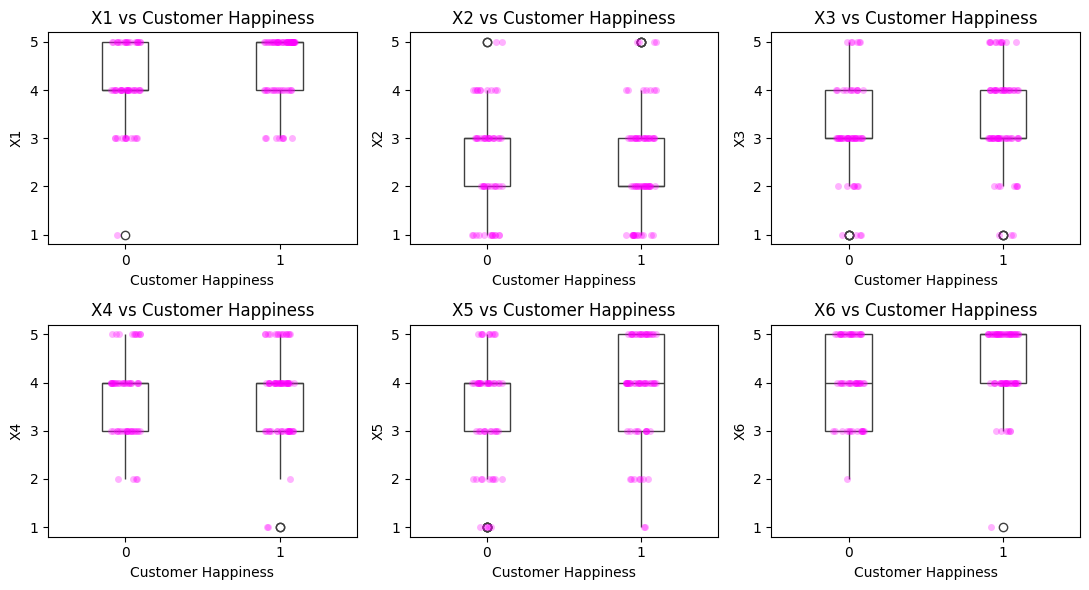

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 6))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Y', y=col, data=df, ax=axes[i],
                width=0.3, showcaps=False,
                boxprops={'facecolor': 'None'})
    sns.stripplot(x='Y', y=col, data=df,
                  ax=axes[i], size=5, color='magenta', alpha=.3)
    axes[i].set_title(f'{col} vs Customer Happiness')
    axes[i].set_xlabel('Customer Happiness')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

#### **Histograms of each feature by Happy and Unhappy customers**

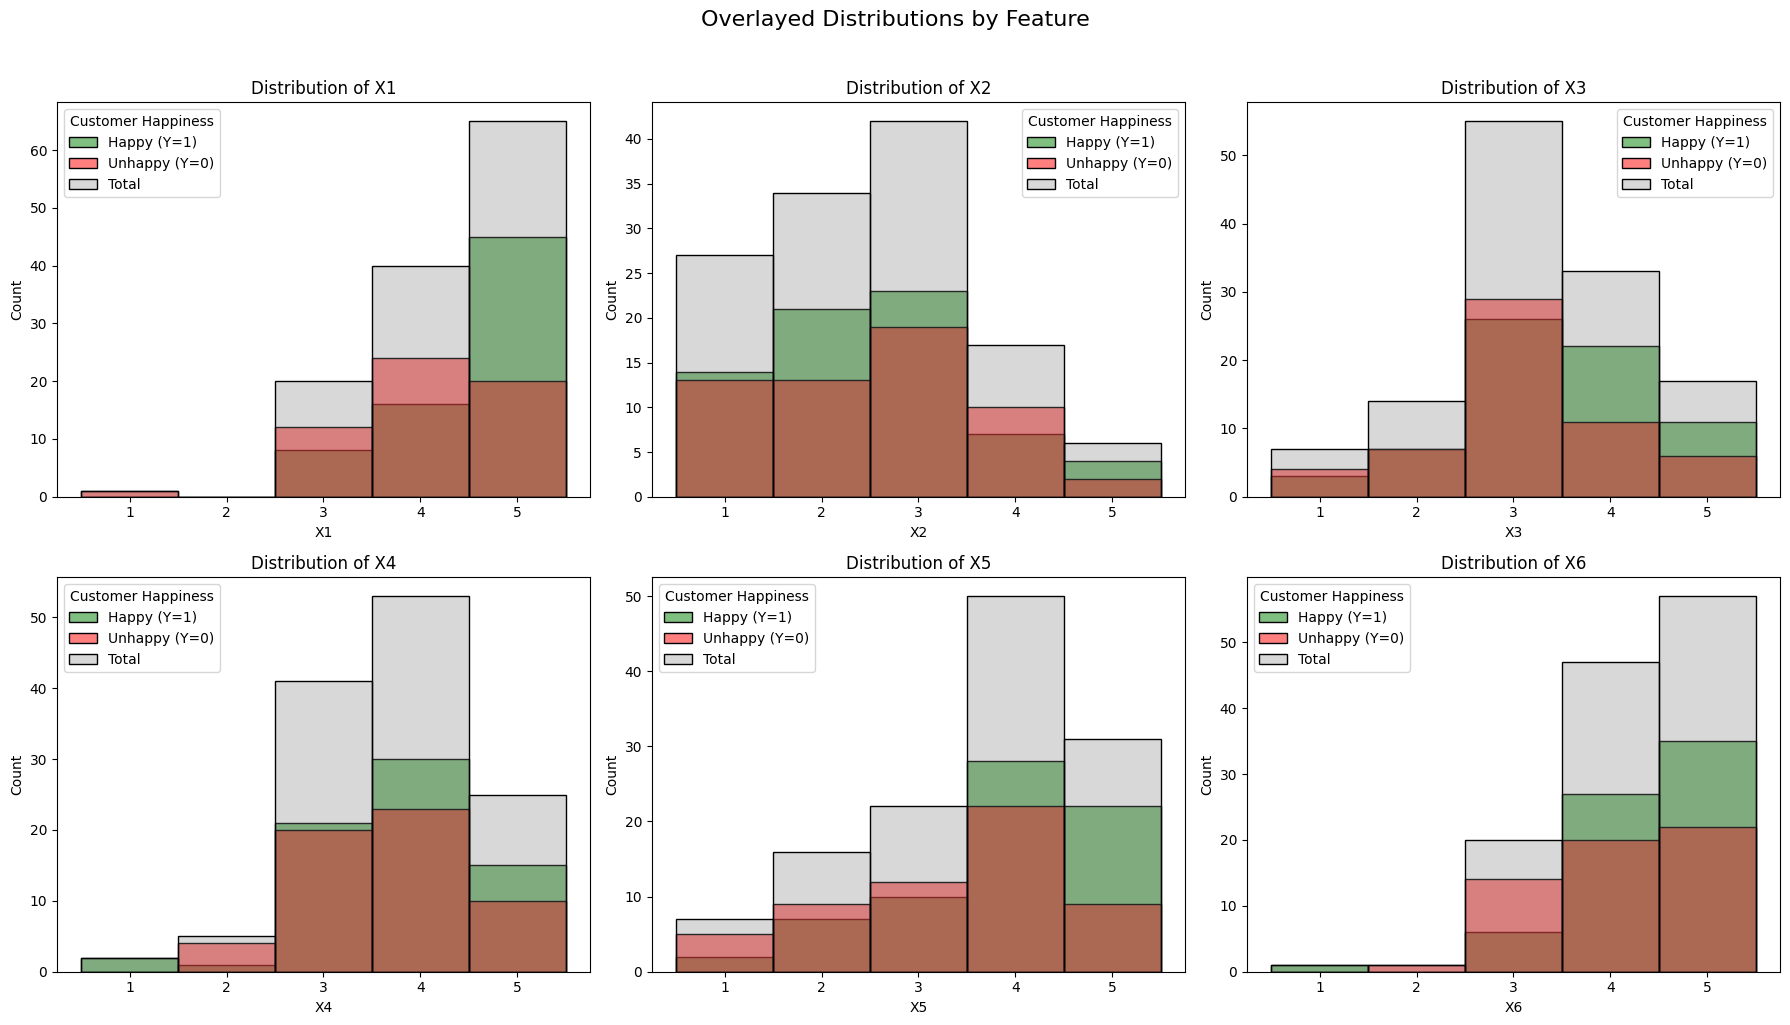

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(data=df, x=col, hue='Y', multiple='layer',
                 palette={0: 'red', 1: 'green'}, edgecolor='black',
                 stat='count', common_bins=True, bins=5, discrete=True, ax=axes[i])

    sns.histplot(data=df, x=col, color='gray', bins=5, discrete=True,
                 stat='count', edgecolor='black', label='Total', ax=axes[i], alpha=0.3)

    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend(title='Customer Happiness', labels=['Happy (Y=1)','Unhappy (Y=0)','Total'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.suptitle("Overlayed Distributions by Feature", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


#### **Correlation Matrix of Features**

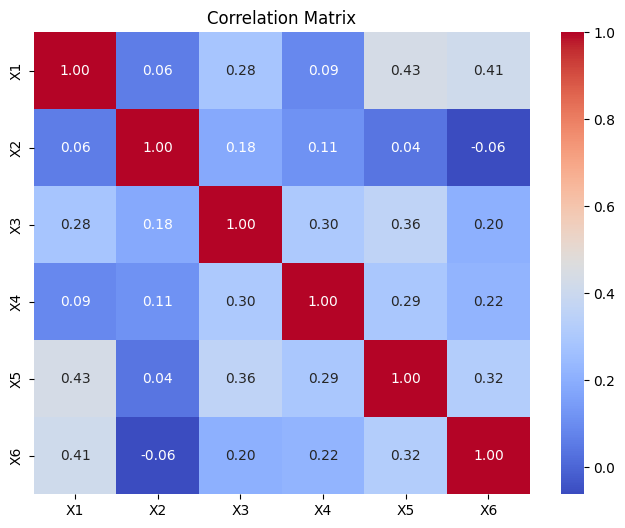

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('Y', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### **Ranking of categorical features from most to least informative with respect to the binary target (based on Mutual Information)**


In [50]:
from sklearn.feature_selection import mutual_info_classif

X = df[["X1", "X2", "X3", "X4", "X5", "X6"]]
y = df["Y"]

def mi_scores(X,y):
    
    # Apply MI
    mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=23)
    
    # Wrap in a DataFrame for readability
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
    mi_df = mi_df.sort_values(by='MI Score', ascending=False)
    
    print(mi_df)

    mi_df.plot(kind='bar', x='Feature', y='MI Score', legend=False, title='Mutual Information with Target')
    plt.ylabel('MI Score')
    plt.tight_layout()
    plt.show()

  Feature  MI Score
0      X1  0.049705
5      X6  0.035543
4      X5  0.027627
3      X4  0.021880
2      X3  0.017432
1      X2  0.009468


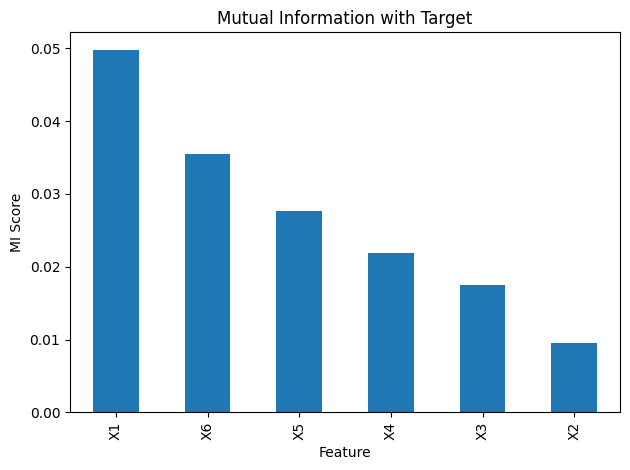

In [52]:
mi_scores(X,y)


#### **Ranking of categorical features using chi-square score by feature**


In [55]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

def chi_score(X,y):
    # Compute Chi2 scores
    chi_scores, p_values = chi2(X, y)
    
    chi2_results = pd.DataFrame({
        'Feature': X.columns,
        'Chi2 Score': chi_scores,
        'p-value': p_values
    }).sort_values(by='Chi2 Score', ascending=False)
    
    print(chi2_results)

    plt.figure(figsize=(8, 5))
    plt.bar(chi2_results['Feature'], chi2_results['Chi2 Score'], color='green')
    plt.title('Chi-Square Scores by Feature')
    plt.xlabel('Feature')
    plt.ylabel('Chi2 Score')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


  Feature  Chi2 Score   p-value
4      X5    2.273286  0.131621
0      X1    1.449041  0.228682
2      X3    0.900104  0.342754
5      X6    0.541070  0.461989
3      X4    0.106194  0.744520
1      X2    0.036161  0.849183


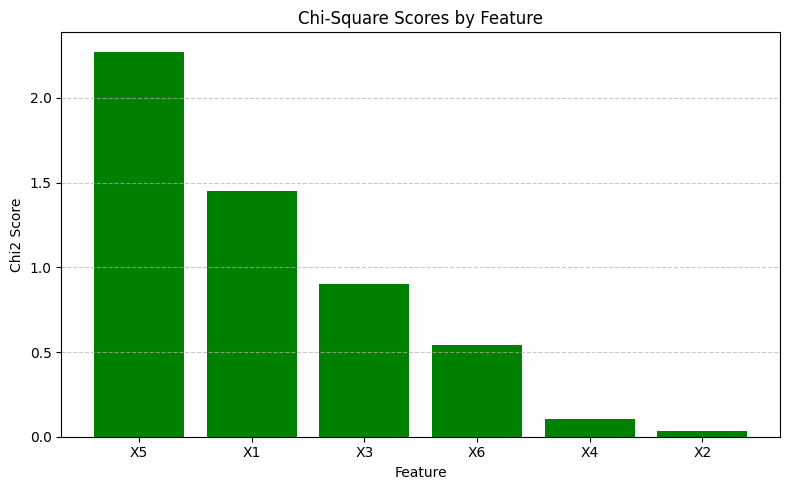

In [57]:
chi_score(X,y)

The higher the chi-square score, the more predictive or informative that feature is about the customer's happiness.

### Feature Importance (Mutual Information and Chi-Square)

| Feature | MI Score | Chi² Score | Interpretation                                    |
|--------:|---------:|-----------:|--------------------------------------------------:|
| **X1**  | 0.0497   | 1.4490     | Top feature by MI, moderately associated by Chi²  |
| **X6**  | 0.0355   | 0.5411     | Second-best in MI, weak Chi² association          |
| **X5**  | 0.0276   | 2.2733     | High in both scores, borderline significant       |
| **X4**  | 0.0219   | 0.1062     | Low impact in both MI and Chi²                    |
| **X3**  | 0.0174   | 0.9001     | Mild in both, not significant                     |
| **X2**  | 0.0095   | 0.0362     | Least informative in both metrics                 |


----

# Experimenting with Prediction Models

In [63]:
import random

In [65]:
#seed = random.randint(1000,9999)
seed = 23
#seed

In [67]:
from sklearn.model_selection import train_test_split
 
X = df[features]
y = df['Y']
# Split the sets using stratify because of the class imbalance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed) 

In [69]:
print(f'Class balance after split: \nSet\tPossitive\tNegattive\nTrain \t{(100*y_train[y_train == 1].shape[0] / y_train.shape[0]):.1f} %\t\t {(100*y_train[y_train == 0].shape[0] / y_train.shape[0]):.1f}%')
print(f'Test \t{(100*y_test[y_test == 1].shape[0] / y_test.shape[0]):.1f} %\t\t {(100*y_test[y_test == 0].shape[0] / y_test.shape[0]):.1f}%')

Class balance after split: 
Set	Possitive	Negattive
Train 	55.0 %		 45.0%
Test 	53.8 %		 46.2%


In [71]:
from lazypredict.Supervised import LazyClassifier

In [72]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose=-1)


In [73]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state=seed)
models_baseline = clf.fit(X_train, X_test, y_train, y_test)[0]
models_baseline


  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.62,0.62,0.62,0.62,0.01
NuSVC,0.58,0.60,0.60,0.55,0.01
Perceptron,0.58,0.59,0.59,0.57,0.01
LabelPropagation,0.58,0.58,0.58,0.58,0.01
RandomForestClassifier,0.54,0.55,0.55,0.52,0.09
ExtraTreeClassifier,0.54,0.55,0.55,0.52,0.01
LGBMClassifier,0.54,0.55,0.55,0.52,0.18
ExtraTreesClassifier,0.54,0.55,0.55,0.53,0.07
DecisionTreeClassifier,0.54,0.55,0.55,0.53,0.01


## General observation: 
**The target accuracy of 73% is significantly higher than the results obtained using popular classification models (ranging from 35% to 62%). To close this gap, we will experiment with feature engineering techniques.**


---

# Feature Engineering

### 1) Combine X1, X5 and X6 (strongest contributor features)

In [81]:
df['X_1_5_6_weighted'] = (0.5 * df['X1'] + 0.3 * df['X5'] + 0.2 * df['X6'])

In [83]:
features += ['X_1_5_6_weighted']
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed) 

In [85]:
models_after_featEng_1 = clf.fit(X_train, X_test, y_train, y_test)[0]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [87]:
models_baseline.rename(columns={'Accuracy': 'Accuracy_BL'}, inplace=True)

In [89]:
comparison_df = models_baseline[['Accuracy_BL']].join(
    models_after_featEng_1[['Accuracy']], rsuffix='_FE_1'
)

comparison_df.rename(columns={'Accuracy': 'Accuracy_FE_1'}, inplace=True)
comparison_df['Delta_Accuracy_FE_1'] = (
    comparison_df['Accuracy_FE_1'] - comparison_df['Accuracy_BL']
)
comparison_df.sort_values(by='Accuracy_BL', ascending=False)

,Accuracy_BL,Accuracy_FE_1,Delta_Accuracy_FE_1
Model,,,
LabelSpreading,0.62,0.62,0.00
NuSVC,0.58,0.54,-0.04
Perceptron,0.58,0.46,-0.12
LabelPropagation,0.58,0.58,0.00
RandomForestClassifier,0.54,0.54,0.00
ExtraTreeClassifier,0.54,0.54,0.00
LGBMClassifier,0.54,0.46,-0.08
ExtraTreesClassifier,0.54,0.54,0.00
DecisionTreeClassifier,0.54,0.50,-0.04


In [93]:
print(f'Features included in Feature Eng. Step 1: \n{features}')
print(f"Sum of Models' Accuracy Gain after Feature Engineering Step 1: {comparison_df['Delta_Accuracy_FE_1'].sum():.2f}%")

Features included in Feature Eng. Step 1: 
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X_1_5_6_weighted']
Sum of Models' Accuracy Gain after Feature Engineering Step 1: -0.04%


### 2) Add Binary Flags: Extremely Good or Bad Scores

In [96]:
for col in ['X1', 'X5', 'X6']:
    df[f'{col}_is_5'] = (df[col] == 5).astype(int)
    df[f'{col}_is_1'] = (df[col] == 1).astype(int)

In [98]:
features += ['X1_is_5', 'X1_is_1', 'X5_is_5', 'X5_is_1', 'X6_is_5', 'X6_is_1']
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed) 

In [100]:
models_after_featEng_2 = clf.fit(X_train, X_test, y_train, y_test)[0]

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [102]:
comparison_df = models_baseline[['Accuracy_BL']].join(
    models_after_featEng_2[['Accuracy']], rsuffix='_FE_1'
)


In [104]:
comparison_df.rename(columns={'Accuracy': 'Accuracy_FE_2'}, inplace=True)
comparison_df['Delta_Accuracy_FE_2'] = (
    comparison_df['Accuracy_FE_2'] - comparison_df['Accuracy_BL']
)
comparison_df.sort_values(by='Accuracy_BL', ascending=False)

,Accuracy_BL,Accuracy_FE_2,Delta_Accuracy_FE_2
Model,,,
LabelSpreading,0.62,0.62,0.00
NuSVC,0.58,0.62,0.04
Perceptron,0.58,0.50,-0.08
LabelPropagation,0.58,0.62,0.04
RandomForestClassifier,0.54,0.62,0.08
ExtraTreeClassifier,0.54,0.54,0.00
LGBMClassifier,0.54,0.46,-0.08
ExtraTreesClassifier,0.54,0.58,0.04
DecisionTreeClassifier,0.54,0.46,-0.08


In [106]:
print(f'Features included in Feature Eng. Step 2: \n{features}')
print(f"Sum of Models' Accuracy Gain after Feature Engineering Step 2: {comparison_df['Delta_Accuracy_FE_2'].sum():.2f}%")


Features included in Feature Eng. Step 2: 
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X_1_5_6_weighted', 'X1_is_5', 'X1_is_1', 'X5_is_5', 'X5_is_1', 'X6_is_5', 'X6_is_1']
Sum of Models' Accuracy Gain after Feature Engineering Step 2: 0.92%


### 3) Add Binary flags for X2 and X4

In [109]:
df['X2_disappointed'] = (df['X2'] < 3).astype(int)
df['X4_bad_price'] = (df['X4'] <= 2).astype(int)

In [111]:
features += ['X2_disappointed', 'X4_bad_price']

In [113]:
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed) 

In [115]:
models_after_featEng_3 = clf.fit(X_train, X_test, y_train, y_test)[0]

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [117]:
comparison_df = models_baseline[['Accuracy_BL']].join(
    models_after_featEng_3[['Accuracy']], rsuffix='_FE_3'
)
comparison_df.rename(columns={'Accuracy': 'Accuracy_FE_3'}, inplace=True)
comparison_df['Delta_Accuracy_FE_3'] = (
    comparison_df['Accuracy_FE_3'] - comparison_df['Accuracy_BL']
)
comparison_df.sort_values(by='Accuracy_BL', ascending=False)

,Accuracy_BL,Accuracy_FE_3,Delta_Accuracy_FE_3
Model,,,
LabelSpreading,0.62,0.62,0.00
NuSVC,0.58,0.54,-0.04
Perceptron,0.58,0.54,-0.04
LabelPropagation,0.58,0.62,0.04
RandomForestClassifier,0.54,0.62,0.08
ExtraTreeClassifier,0.54,0.62,0.08
LGBMClassifier,0.54,0.46,-0.08
ExtraTreesClassifier,0.54,0.65,0.12
DecisionTreeClassifier,0.54,0.50,-0.04


In [119]:
print(f'Features included in Feature Eng. Step 3: \n{features}')
print(f"Sum of Models' Accuracy Gain after Feature Engineering Step 3: {comparison_df['Delta_Accuracy_FE_3'].sum():.2f}%")

Features included in Feature Eng. Step 3: 
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X_1_5_6_weighted', 'X1_is_5', 'X1_is_1', 'X5_is_5', 'X5_is_1', 'X6_is_5', 'X6_is_1', 'X2_disappointed', 'X4_bad_price']
Sum of Models' Accuracy Gain after Feature Engineering Step 3: 1.08%


### Plot the Partial Dependence of Selected Features on Prediction

In [122]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [124]:
model_RF = RandomForestClassifier(random_state=seed)  # We selected the Random Forest Model to plot the Dependence of Selected Features
model_RF.fit(X_train, y_train)

result = permutation_importance(model_RF, X_test, y_test, n_repeats=30, random_state=seed)


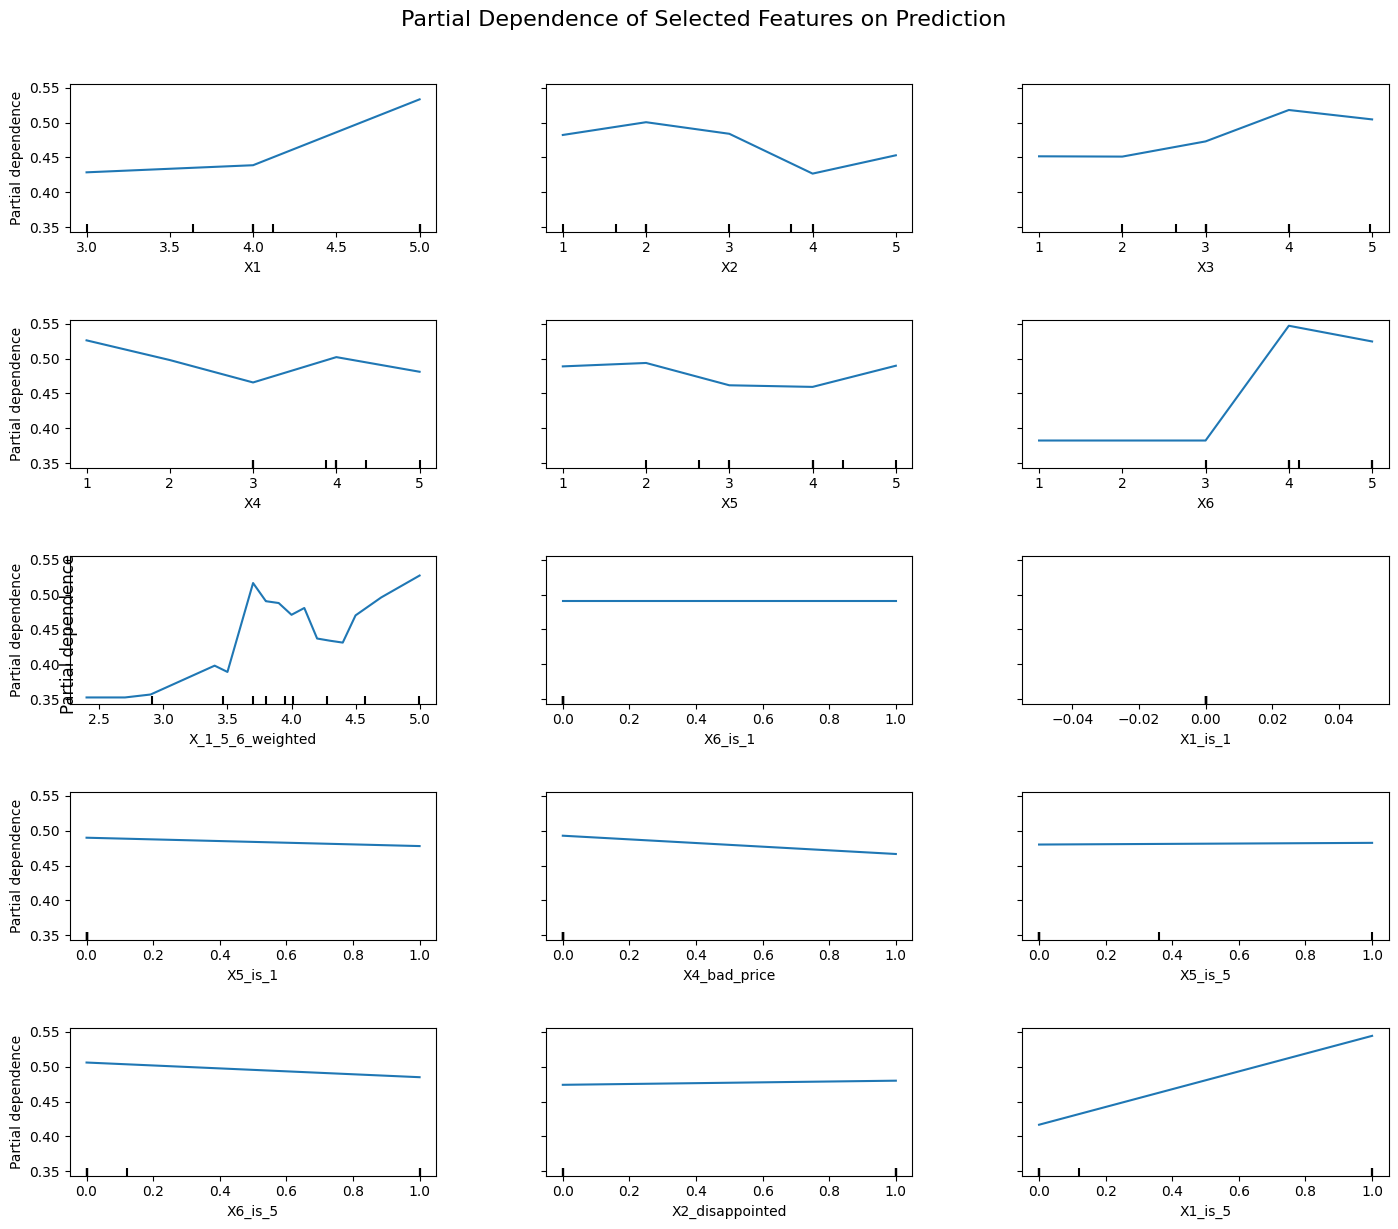

In [126]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_to_plot = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                    'X_1_5_6_weighted', 'X6_is_1', 'X1_is_1',
                    'X5_is_1', 'X4_bad_price', 'X5_is_5',
                    'X6_is_5', 'X2_disappointed', 'X1_is_5']

fig, ax = plt.subplots(figsize=(14, 12))  # increase total figure size

pdp_display = PartialDependenceDisplay.from_estimator(
    model_RF, X_test, features=features_to_plot,
    kind='average', grid_resolution=20, ax=ax
)

# Update spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.3)  # hspace controls row spacing

# Set one y-axis label
fig.text(0.04, 0.5, 'Partial dependence', va='center', rotation='vertical', fontsize=12)

plt.suptitle("Partial Dependence of Selected Features on Prediction", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


#### Some features show clear trends. Others are flat → meaning they contribute almost nothing to prediction.
#### Then, I will perform the following feature selection:
Keep (clear upward, steep jumps or negative slope):
* X1_is_5,
* X_1_5_6_weighted,
* X6_is_5,
* X1,
* X3,
  
Remove (flat, very noisy):
* X1_is_1,
* X5_is_1,
* X6_is_1,
* X5_is_5,
* X2_disappointed,
* X4_bad_price,
  


## Feature Selection

In [130]:
features

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X_1_5_6_weighted',
 'X1_is_5',
 'X1_is_1',
 'X5_is_5',
 'X5_is_1',
 'X6_is_5',
 'X6_is_1',
 'X2_disappointed',
 'X4_bad_price']

In [132]:
# Important: X2 and X4 were removed due to consistently low importance scores 
# in both Mutual Information and Chi-Square tests, indicating weak predictive power.
features_to_remove= ['X2', 'X4', 'X1_is_1', 'X5_is_5', 'X5_is_1', 'X6_is_1', 'X2_disappointed', 'X4_bad_price']
for feature in features_to_remove: 
    features.remove(feature)


In [134]:
features

['X1', 'X3', 'X5', 'X6', 'X_1_5_6_weighted', 'X1_is_5', 'X6_is_5']

In [136]:
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed) 

In [138]:
models_after_featEng_4 = clf.fit(X_train, X_test, y_train, y_test)[0]

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [140]:
comparison_df = models_baseline[['Accuracy_BL']].join(
    models_after_featEng_4[['Accuracy']], rsuffix='_FE_4'
)
comparison_df.rename(columns={'Accuracy': 'Accuracy_FE_4'}, inplace=True)
comparison_df['Delta_Accuracy_FE_4'] = (
    comparison_df['Accuracy_FE_4'] - comparison_df['Accuracy_BL']
)
comparison_df.sort_values(by='Accuracy_BL', ascending=False)

,Accuracy_BL,Accuracy_FE_4,Delta_Accuracy_FE_4
Model,,,
LabelSpreading,0.62,0.65,0.04
NuSVC,0.58,0.65,0.08
Perceptron,0.58,0.46,-0.12
LabelPropagation,0.58,0.62,0.04
RandomForestClassifier,0.54,0.65,0.12
ExtraTreeClassifier,0.54,0.65,0.12
LGBMClassifier,0.54,0.42,-0.12
ExtraTreesClassifier,0.54,0.65,0.12
DecisionTreeClassifier,0.54,0.58,0.04


In [142]:
print(f'Features included in Feature Eng. Step 4: \n{features}')
print(f"Sum of Models' Accuracy Gain after Feature Engineering Step 4: {comparison_df['Delta_Accuracy_FE_4'].sum():.2f}%")

Features included in Feature Eng. Step 4: 
['X1', 'X3', 'X5', 'X6', 'X_1_5_6_weighted', 'X1_is_5', 'X6_is_5']
Sum of Models' Accuracy Gain after Feature Engineering Step 4: 1.31%


### Feature Sellection:

| Feature                | Type                 | Likely Impact                              |
|------------------------|----------------------|---------------------------------------------|
| `X1`, `X3`, `X5`, `X6` | Categorical (0–5)    | Core question responses                     |
| `X_1_5_6_weighted`     | Numeric (engineered) | Weighted aggregation of important features  |
| `X1_is_5`, `X6_is_5`   | Binary flags         | High-satisfaction indicators                |


----

## Optimize the model and hyperparameters

## RandomizedSearch

In [167]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


In [153]:
# Define the model
model = RandomForestClassifier(random_state=seed)


In [155]:
# Define the parameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}


In [157]:
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=23,
    verbose=2
)



In [159]:
# Fit the model
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002837F3FB830>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002837F7CFD10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000283659FD160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002837F7FE9F0>},
                   random_state=23, scoring='accuracy', verbose=2)

In [169]:
# Evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Best Params: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 77}
Accuracy: 0.5769230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.83      0.65        12
           1       0.71      0.36      0.48        14

    accuracy                           0.58        26
   macro avg       0.62      0.60      0.56        26
weighted avg       0.63      0.58      0.55        26



## GridSearch

In [172]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=23),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [174]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Best Params:", grid_search.best_params_)


Accuracy: 0.46153846153846156
              precision    recall  f1-score   support

           0       0.42      0.42      0.42        12
           1       0.50      0.50      0.50        14

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26

Best Params: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


### RandomizedSearch (with different params)


In [177]:
test_model = RandomForestClassifier(
    n_estimators=75,
    max_depth=7,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=23
)

test_model.fit(X_train, y_train)
print("Manual model fit successful.")

Manual model fit successful.


In [179]:
random_search_smarter = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=23,
    verbose=2,
    n_jobs=1
)
random_search_smarter.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=3, n_estimators=81; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=3, n_estimators=81; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=3, n_estimators=81; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=3, n_estimators=81; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=3, n_estimators=81; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=56; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=56; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=56; total time=  

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
                   n_iter=30, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002837F3FB830>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002837F7CFD10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000283659FD160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002837F7FE9F0>},
                   random_state=23, scoring='accuracy', verbose=2)

In [181]:
best_model = random_search.best_estimator_


In [183]:
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.577
              precision    recall  f1-score   support

           0       0.53      0.83      0.65        12
           1       0.71      0.36      0.48        14

    accuracy                           0.58        26
   macro avg       0.62      0.60      0.56        26
weighted avg       0.63      0.58      0.55        26



In [189]:
print("Best Params:", random_search.best_params_)

Best Params: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 77}


### Finally, neither Random Search nor Grid Search yielded a better-performing model for the selected features, with the highest accuracy remaining at 65%.

----

### Different Models Experimentation (a second round)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Best features so far
selected_features = ['X1', 'X3', 'X5', 'X6', 'X_1_5_6_weighted', 'X1_is_5', 'X6_is_5']
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Dictionary to hold results
models = {
    "Random Forest": RandomForestClassifier(random_state=23, n_estimators=100, max_features='sqrt'),
    "AdaBoost": AdaBoostClassifier(random_state=23, n_estimators=100, algorithm='SAMME'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=23, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=23, eval_metric='logloss')
}

# Loop through models
for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n{name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

### Feature Engineering (is this a third round?...:-))

Let's add 3 more features

In [ ]:
feature_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

df['X5_minus_X6'] = df['X5'] - df['X6']
df['X_avg_all'] = df[feature_cols].mean(axis=1)
df['num_fives'] = df[feature_cols].apply(lambda row: (row == 5).sum(), axis=1)

In [ ]:
features += ['X5_minus_X6', 'X_avg_all', 'num_fives']
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [ ]:
mi_scores(X,y)

In [ ]:
chi_score(X.drop('X5_minus_X6', axis=1),y)

#### Acording with the results (MI and Chi^2 Scores), `num_fives` and `X_avg_all` seem promising! 

----

## Exploring Feature Combinations

We will experiment with all possible feature subsets ranging from 4 to 10 features, using the 10 previously selected variables.
Given the small size of the dataset, the computational time required for this brute-force approach would be acceptable.


In [ ]:
from itertools import combinations
from tqdm import tqdm

global_feature_selection = [
    'X1', 'X3', 'X5', 'X6', 'X_1_5_6_weighted',
    'X1_is_5', 'X6_is_5', 'X5_minus_X6', 'X_avg_all', 'num_fives'
]

results = []

# Total number of combinations to evaluate
total_combos = sum(len(list(combinations(global_feature_selection, r))) for r in range(4, len(global_feature_selection) + 1))

with tqdm(total=total_combos, desc="Evaluating combinations") as pbar:
    for r in range(4, len(global_feature_selection) + 1):
        for combo in combinations(global_feature_selection, r):
            selected_features = list(combo)
            X = df[selected_features]
            y = df['Y']

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, stratify=y, random_state=23
            )

            model_RF = RandomForestClassifier(random_state=23)
            model_RF.fit(X_train, y_train)
            y_pred_RF = model_RF.predict(X_test)

            acc = round(accuracy_score(y_test, y_pred_RF), 6)
            results.append({'features': selected_features, 'accuracy': acc})
            pbar.update(1)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

results_df.head(10)


In [ ]:
best_features = ['X1', 'X5', 'X1_is_5', 'X6_is_5', 'X_avg_all']  # indeed, 2 different model sellection were the best performing

X = df[best_features]
y = df['Y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23)
final_model = RandomForestClassifier(random_state=23)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)


In [ ]:
# Evaluation
print("Final Random Forest Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
importances = final_model.feature_importances_
plt.figure(figsize=(6, 3))
plt.barh(best_features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Final Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

#### The best-performing model achieved **76.9%** accuracy. The most influential feature was X_avg_all, confirming the predictive power of aggregating key satisfaction inputs.

----

### Bonus Answer: Minimal Predictive Feature Set

To determine the most important questions for predicting customer happiness, we performed an exhaustive feature selection using a Random Forest classifier, evaluating all combinations from 4 to 10 features out of a curated set of 10.

#### Top-Performing Feature Sets:
Two different feature combinations reached the highest accuracy of 76.9%:

['X1', 'X5', 'X1_is_5', 'X6_is_5', 'X_avg_all']

[X1, X3, X6, X1_is_5, X6_is_5, num_fives] 	

##### This suggests that the model can achieve optimal performance using different subsets of questions, as long as the core predictors are included.

#### Insights:
* X1 appears in both, confirming it's a strong predictor.
* X2 and X4 do not appear in either top-performing group, confirming they have low predictive power (also supported by Mutual Information and Chi-Square analysis).
* Engineered features like `X_avg_all` and `num_fives` added significant value.

#### Recommendation:
You can remove questions X2 and X4 from future surveys without impacting model performance.
